In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

### Data:includes features 

In [2]:
vma=pd.read_csv(r'C:\Users\femif\Downloads\final_data.csv\vehicle_manufacturing.csv.xls')
vma

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
0,1,Toyota,Camry,2018,White,45000,18000,Los Angeles
1,2,Honda,Civic,2019,Blue,35000,16000,New York
2,3,Ford,Focus,2017,Silver,55000,14000,Chicago
3,4,Chevrolet,Cruze,2016,Red,60000,12000,Miami
4,5,Hyundai,Elantra,2018,Black,40000,15000,San Francisco
...,...,...,...,...,...,...,...,...
1995,1996,Hyundai,Palisade,2019,Silver,65000,22000,San Francisco
1996,1997,Toyota,Sienna,2018,Red,55000,16000,Dallas
1997,1998,Honda,Fit,2018,Gray,50000,14000,Atlanta
1998,1999,Ford,Fusion,2017,White,55000,19000,Phoenix


# 1. Descriptive Statistics:
o Get basic statistics for numerical columns (Year, Mileage, Price).


In [17]:
vma[['Year','Mileage','Price']].describe()

,Year,Mileage,Price
count,2000.000000,2000.000000,2000.000000
mean,2017.454500,47452.500000,19605.000000
std,1.704812,11016.279906,4777.592249
min,2015.000000,25000.000000,12000.000000
25%,2016.000000,40000.000000,16000.000000
50%,2017.000000,50000.000000,19000.000000
75%,2019.000000,55000.000000,23000.000000
max,2020.000000,70000.000000,29000.000000


o Calculate summary statistics such as mean, median, standard deviation, etc.

In [18]:
vma.describe()

,Car ID,Year,Mileage,Price
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2017.454500,47452.500000,19605.000000
std,577.494589,1.704812,11016.279906,4777.592249
min,1.000000,2015.000000,25000.000000,12000.000000
25%,500.750000,2016.000000,40000.000000,16000.000000
50%,1000.500000,2017.000000,50000.000000,19000.000000
75%,1500.250000,2019.000000,55000.000000,23000.000000
max,2000.000000,2020.000000,70000.000000,29000.000000


In [21]:
mean_values = vma[['Year', 'Mileage', 'Price']].mean().reset_index()

In [22]:
mean_values

,index,0
0,Year,2017.4545
1,Mileage,47452.5000
2,Price,19605.0000


In [24]:
median_values = vma[['Year', 'Mileage', 'Price']].median().reset_index()
median_values

,index,0
0,Year,2017.0
1,Mileage,50000.0
2,Price,19000.0


In [26]:
std_values= vma[['Year', 'Mileage', 'Price']].std().reset_index()
std_values

,index,0
0,Year,1.704812
1,Mileage,11016.279906
2,Price,4777.592249


# 2. Data Cleaning:
o Check for missing values and handle them appropriately (imputation or removal).


In [28]:
vma.isnull().sum()

Car ID      0
Brand       0
Model       0
Year        0
Color       0
Mileage     0
Price       0
Location    0
dtype: int64

there are no missing values

o Identify and handle any duplicates in the dataset.

In [34]:
vma.duplicated().sum()

0

# 3. Exploratory Data Analysis (EDA):
o Explore the distribution of car years, mileage, and prices.


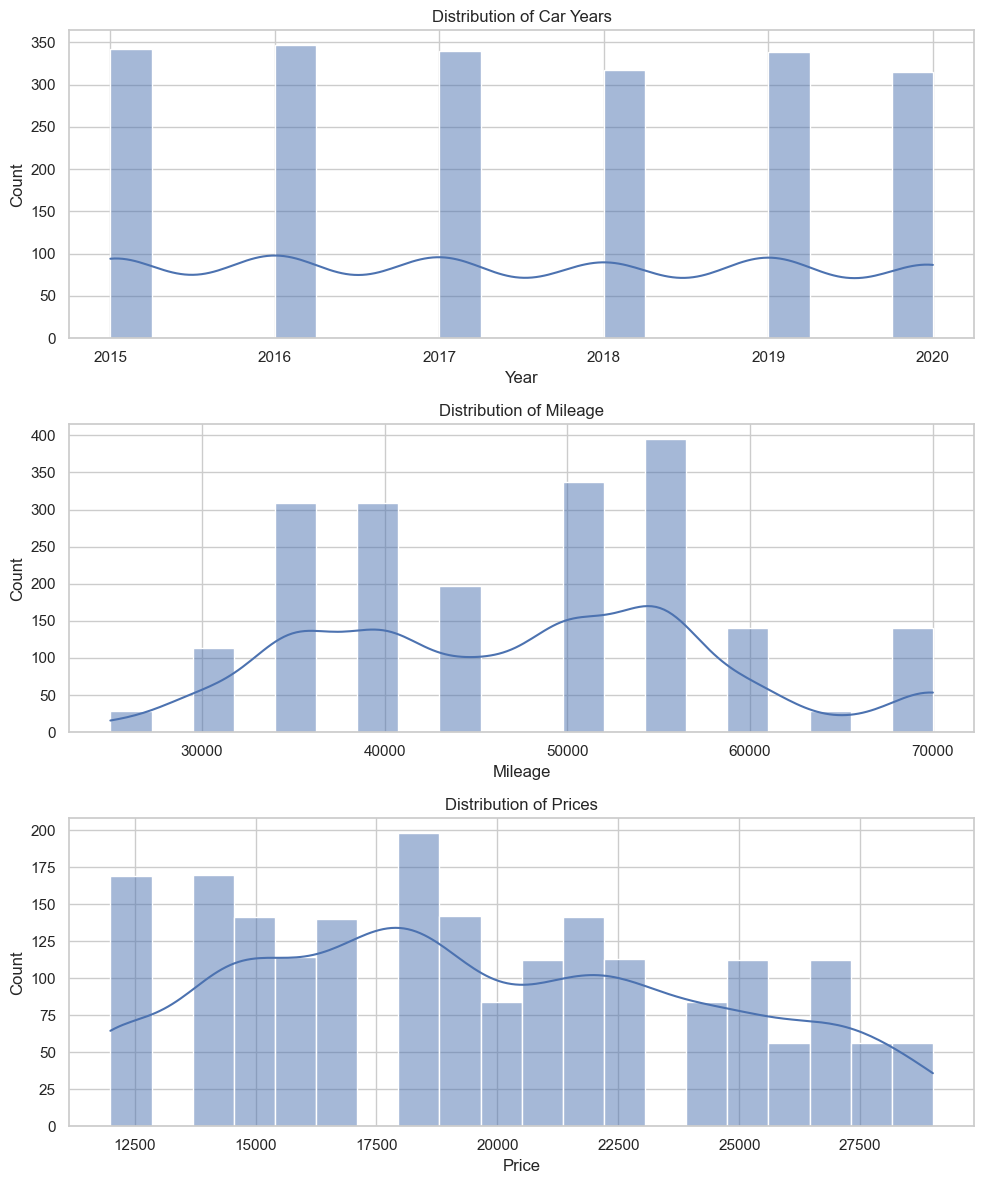

In [45]:

sns.set(style="whitegrid")

# Create subplots for each feature
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plot histograms for Year, Mileage, and Price
sns.histplot(vma['Year'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Car Years')

sns.histplot(vma['Mileage'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Mileage')

sns.histplot(vma['Price'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Prices')

# Adjust layout
plt.tight_layout()
plt.show()



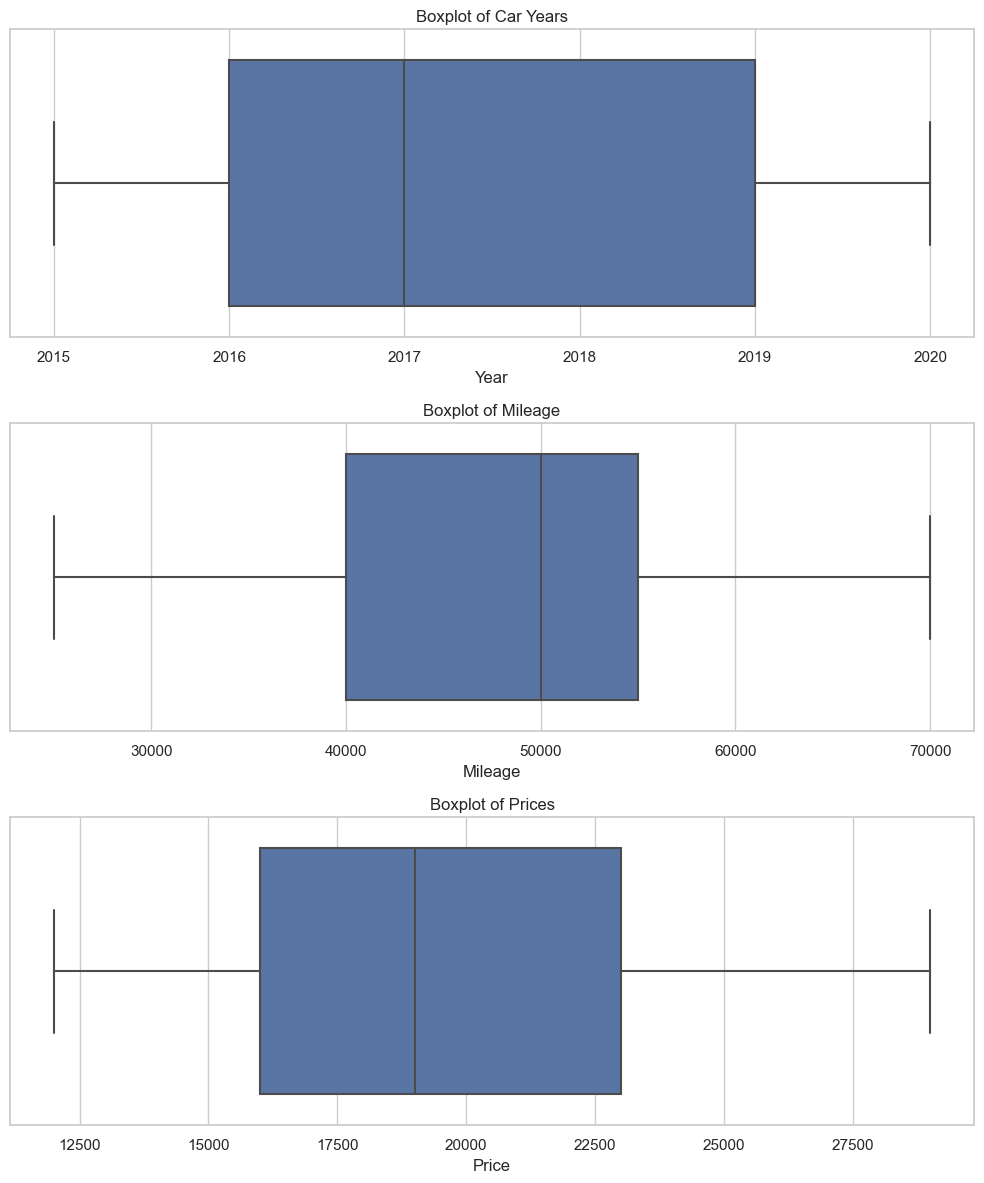

In [43]:
# Box plots for Year, Mileage, and Price
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
# Box plots
sns.boxplot(x=vma['Year'], ax=axes[0])
axes[0].set_title('Boxplot of Car Years')

sns.boxplot(x=vma['Mileage'], ax=axes[1])
axes[1].set_title('Boxplot of Mileage')

sns.boxplot(x=vma['Price'], ax=axes[2])
axes[2].set_title('Boxplot of Prices')

# Adjust layout
plt.tight_layout()
plt.show()

o Check the distribution of colors and locations.

In [46]:
vma.head()

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
0,1,Toyota,Camry,2018,White,45000,18000,Los Angeles
1,2,Honda,Civic,2019,Blue,35000,16000,New York
2,3,Ford,Focus,2017,Silver,55000,14000,Chicago
3,4,Chevrolet,Cruze,2016,Red,60000,12000,Miami
4,5,Hyundai,Elantra,2018,Black,40000,15000,San Francisco


In [50]:
vma['Color'].unique()


array(['White', 'Blue', 'Silver', 'Red', 'Black', 'Gray', 'Yellow'],
      dtype=object)

In [51]:
vma['Location'].unique()


array(['Los Angeles', 'New York', 'Chicago', 'Miami', 'San Francisco',
       'Dallas', 'Atlanta', 'Phoenix', 'Houston', 'Seattle'], dtype=object)

<Axes: >

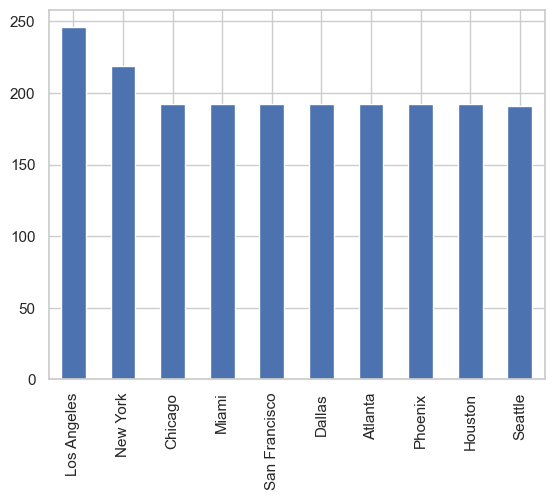

In [58]:
vma['Location'].value_counts().plot(kind='bar')

<Axes: >

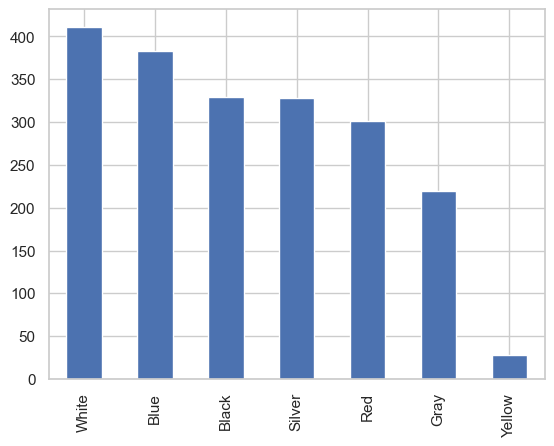

In [59]:
vma['Color'].value_counts().plot(kind='bar')

o Investigate the most common brands and models.


<Axes: >

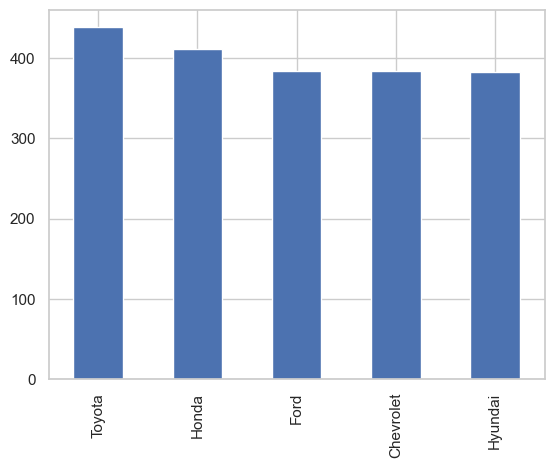

In [63]:
vma['Brand'].value_counts().plot(kind='bar')

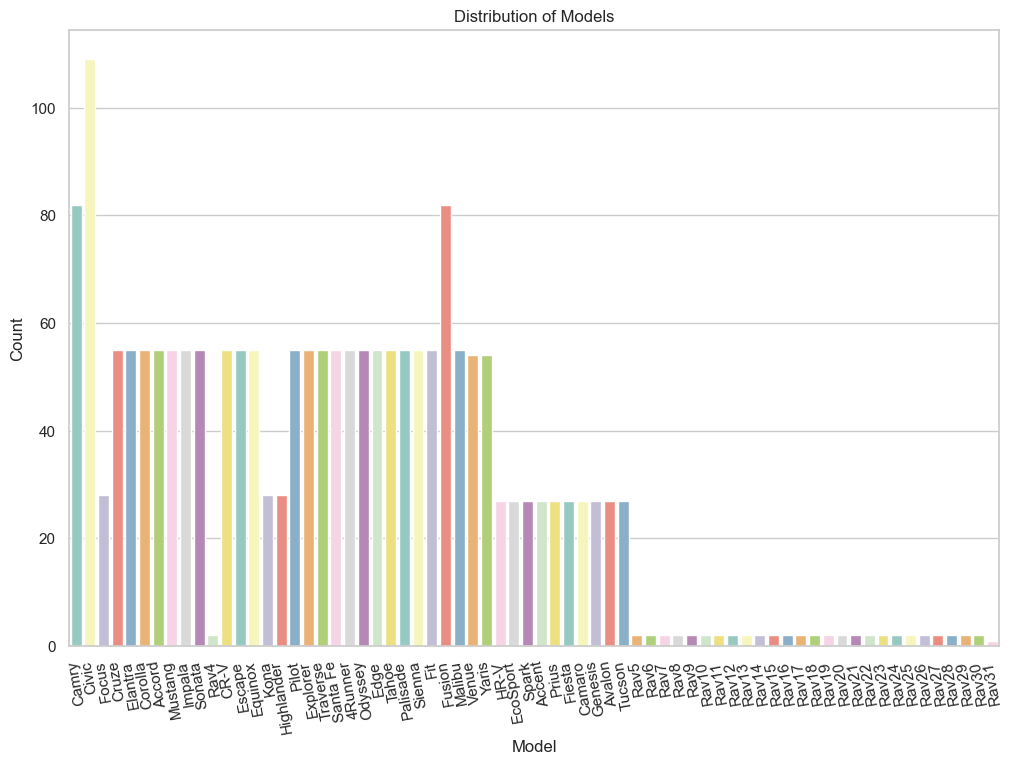

In [71]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Model', data=vma,  palette='Set3')
plt.title('Distribution of Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=100)
plt.show()

.Most common brand is toyota


Most common model is civic

# 4. Visualizations:
o Create histograms, box plots, or violin plots to visualize the distribution of 
numerical features.


<Figure size 1200x800 with 0 Axes>

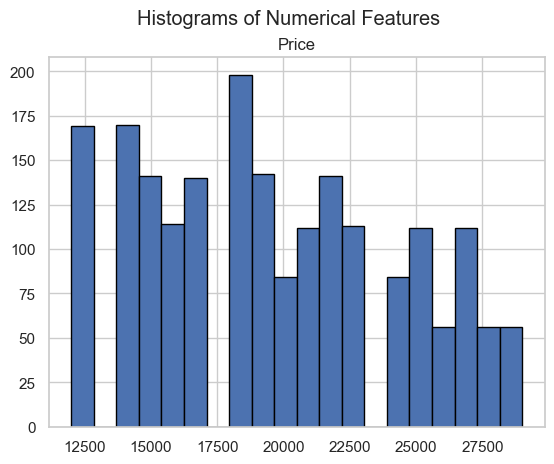

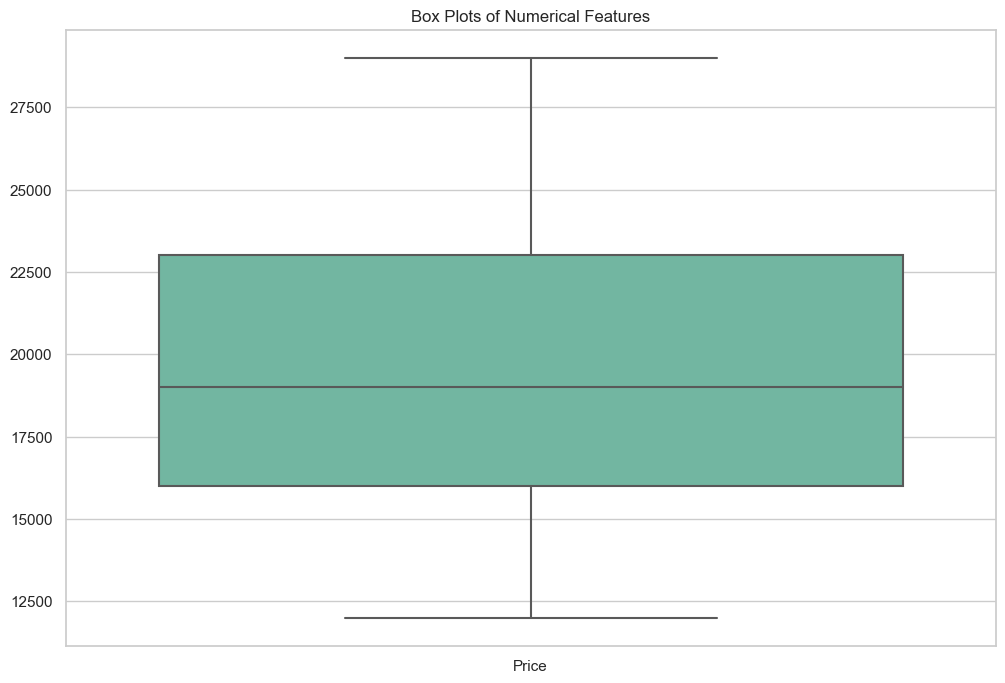

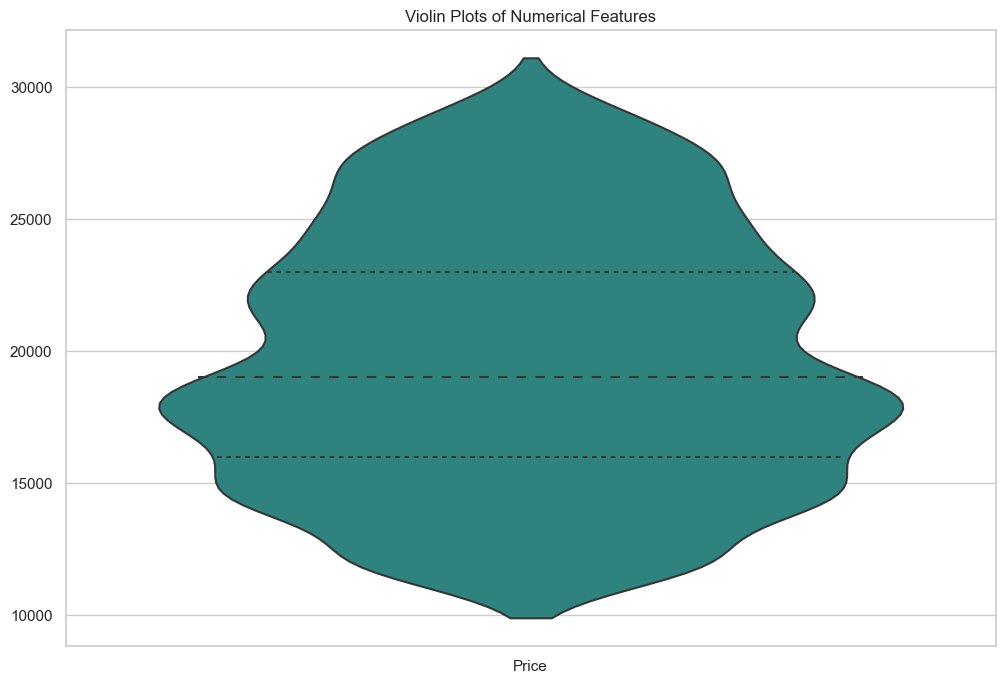

In [81]:
numerical_features = vma[['Price','Brand','Model']]


plt.figure(figsize=(12, 8))
numerical_features.hist(bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_features, palette='Set2')
plt.title('Box Plots of Numerical Features')
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(data=numerical_features, palette='viridis', inner='quartile')
plt.title('Violin Plots of Numerical Features')
plt.show()

o Use bar charts to visualize the distribution of categorical features like Brand, 
Color, and Location.

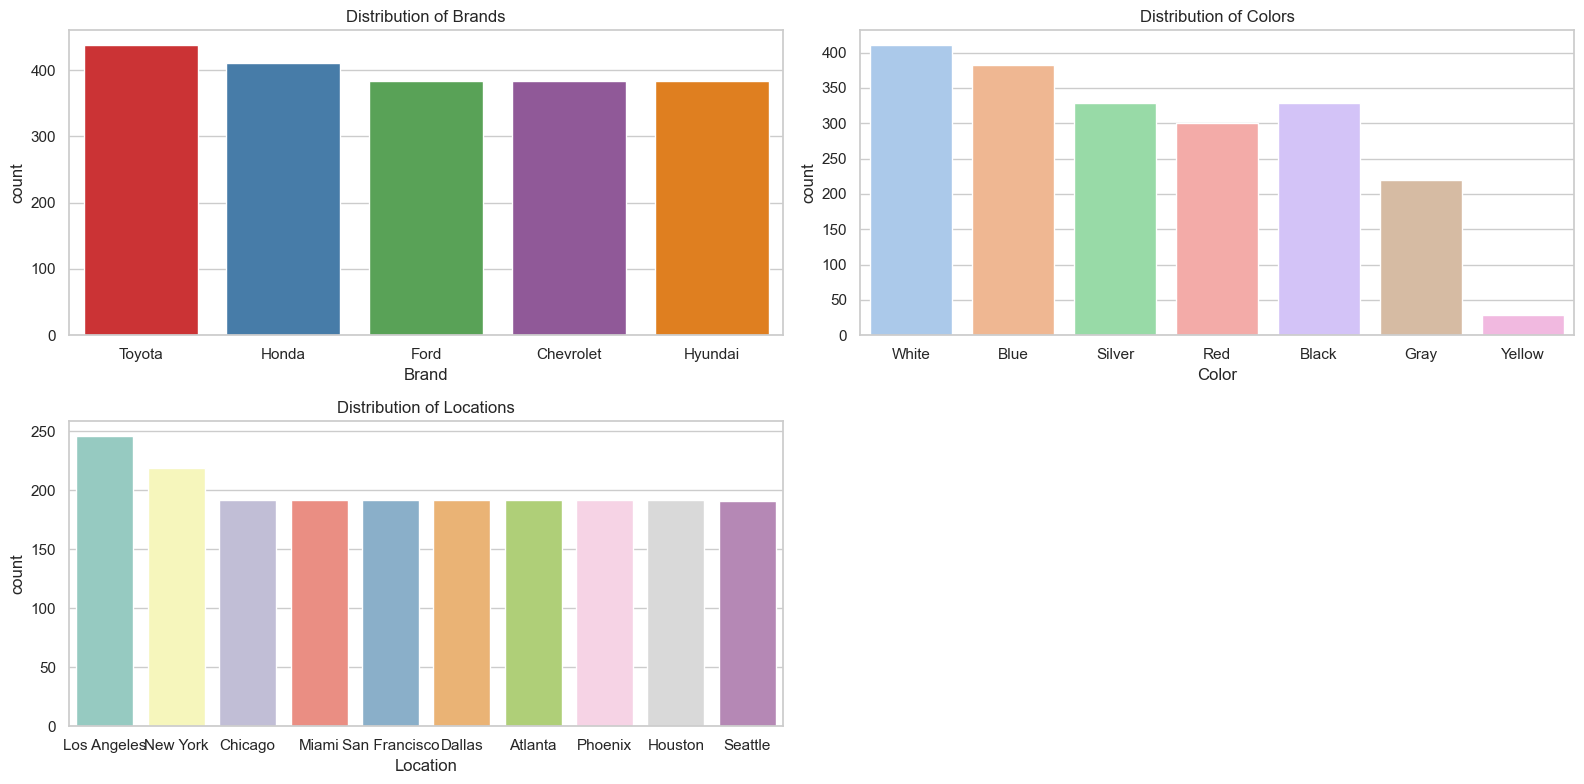

In [82]:
categorical_features = vma[['Brand', 'Color', 'Location']]


plt.figure(figsize=(16, 8))


plt.subplot(2, 2, 1)
sns.countplot(x='Brand', data=categorical_features, palette='Set1')
plt.title('Distribution of Brands')


plt.subplot(2, 2, 2)
sns.countplot(x='Color', data=categorical_features, palette='pastel')
plt.title('Distribution of Colors')


plt.subplot(2, 2, 3)
sns.countplot(x='Location', data=categorical_features, palette='Set3')
plt.title('Distribution of Locations')

plt.tight_layout()
plt.show()

o Scatter plots to explore relationships between variables (e.g., Mileage vs. Price).

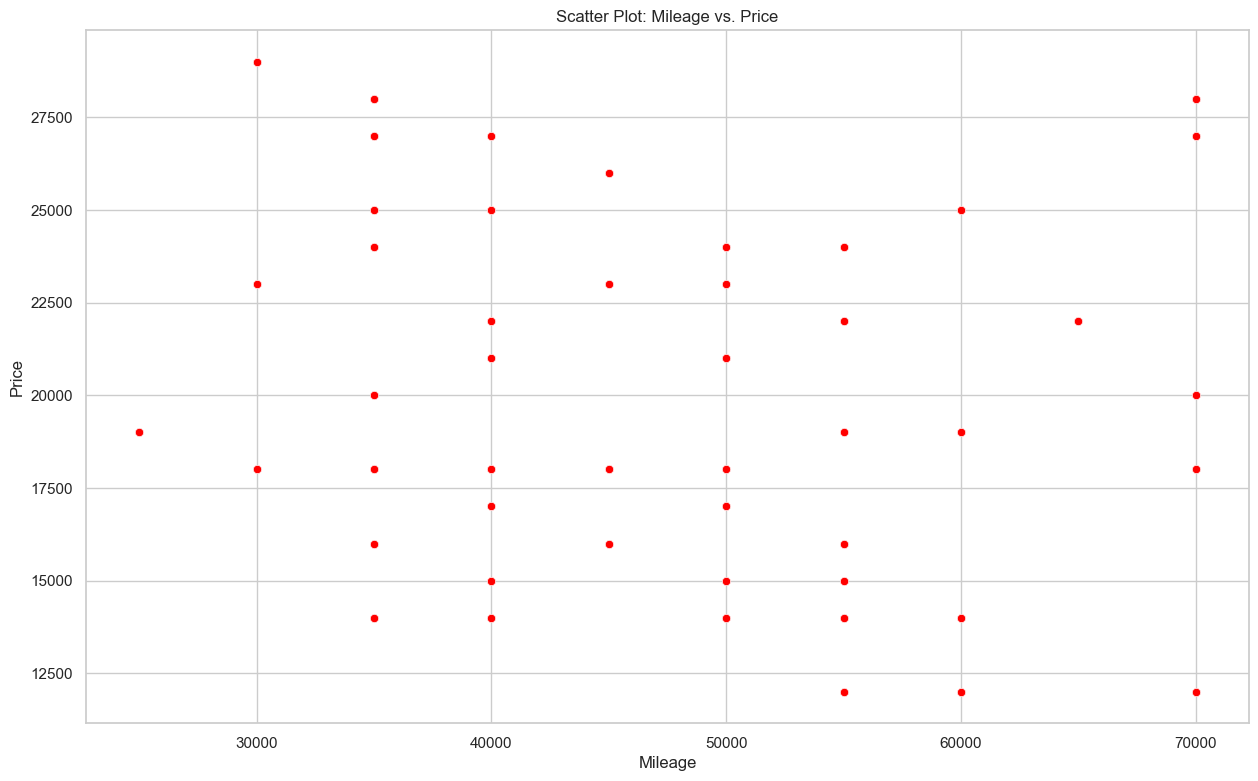

In [83]:
df=vma[['Mileage','Price']]
plt.figure(figsize=(15,9))
sns.scatterplot(x='Mileage',y='Price',data=df,color='red')
plt.title('Scatter Plot: Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()



# 5. Price Analysis:
o Analyze the average prices of different brands or models.

In [ ]:
price_analysis_data = vma[['Brand', 'Model', 'Price']]
average_prices_by_brand = price_analysis_data.groupby('Brand')['Price'].mean().sort_values(ascending=False)

In [95]:
vma.groupby('Brand')['Price'].mean()

Brand
Chevrolet    19679.687500
Ford         19567.708333
Honda        19635.036496
Hyundai      19629.242820
Toyota       19522.831050
Name: Price, dtype: float64

<Axes: xlabel='Brand'>

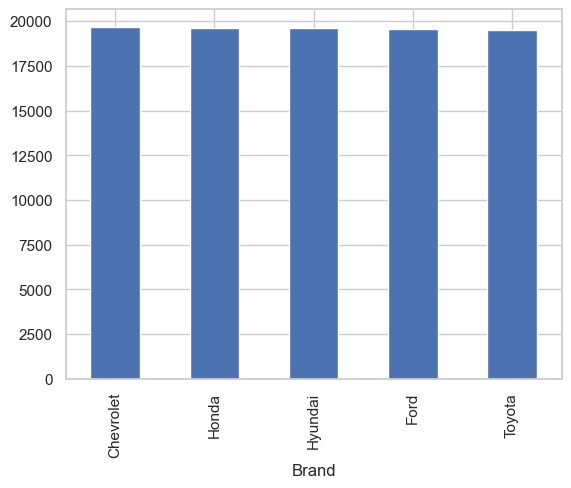

In [106]:
vma.groupby('Brand')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

In [101]:
vma.groupby('Model')['Price'].mean()

Model
4Runner     19018.181818
Accent      19185.185185
Accord      20345.454545
Avalon      20666.666667
CR-V        20600.000000
                ...     
Tahoe       19200.000000
Traverse    19472.727273
Tucson      19814.814815
Venue       18685.185185
Yaris       18777.777778
Name: Price, Length: 68, dtype: float64

<Axes: xlabel='Model'>

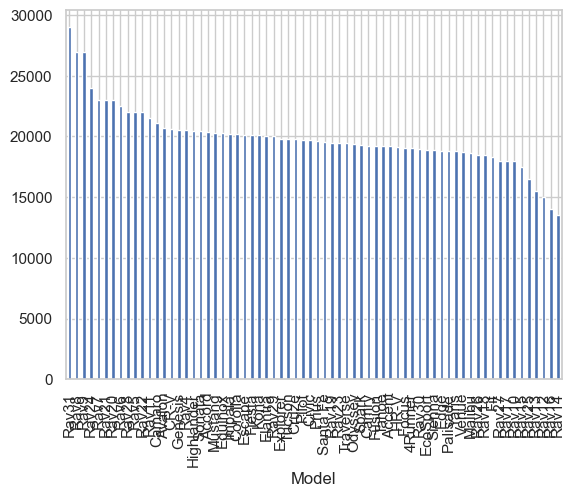

In [105]:
vma.groupby('Model')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

o Identify factors affecting the price, such as the year of manufacture or mileage.

In [3]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

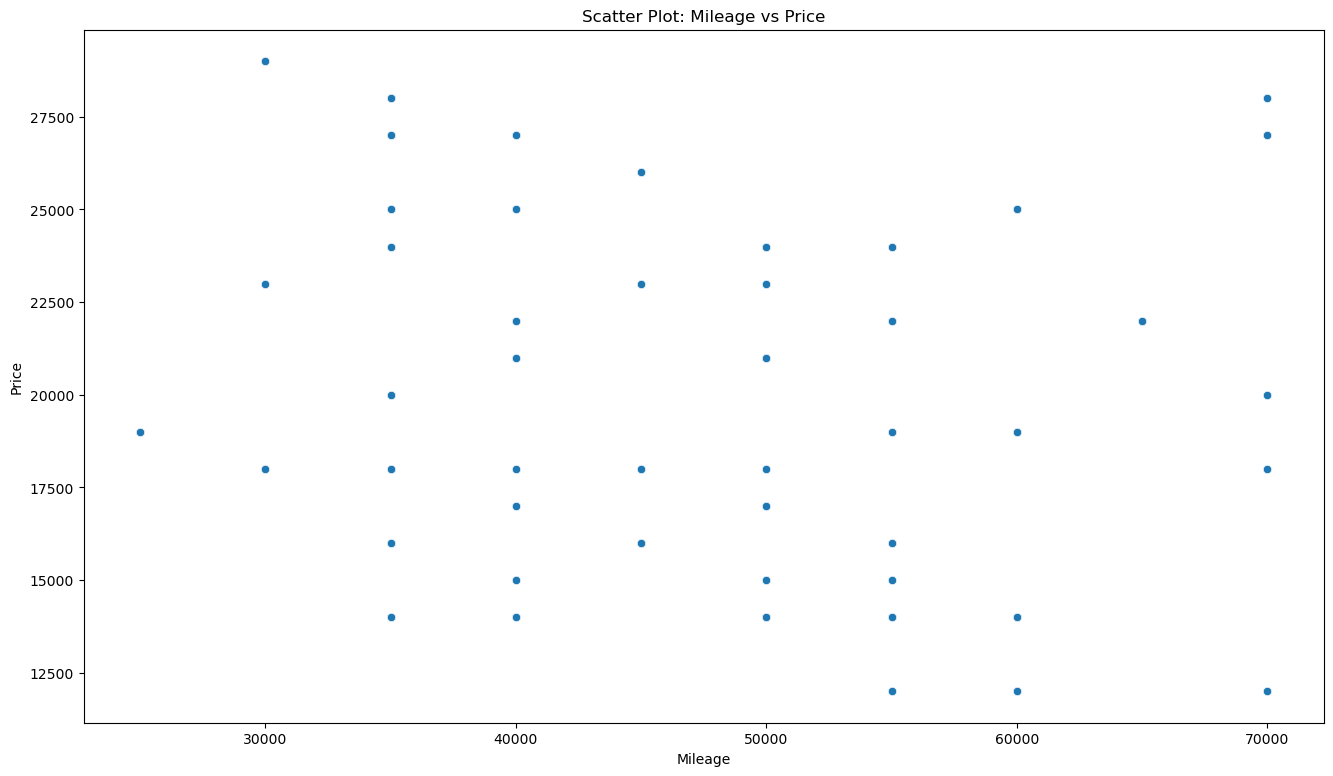

In [6]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='Mileage',y='Price',data=vma)
plt.title('Scatter Plot: Mileage vs Price')
plt.show()



In [7]:
vma

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
0,1,Toyota,Camry,2018,White,45000,18000,Los Angeles
1,2,Honda,Civic,2019,Blue,35000,16000,New York
2,3,Ford,Focus,2017,Silver,55000,14000,Chicago
3,4,Chevrolet,Cruze,2016,Red,60000,12000,Miami
4,5,Hyundai,Elantra,2018,Black,40000,15000,San Francisco
...,...,...,...,...,...,...,...,...
1995,1996,Hyundai,Palisade,2019,Silver,65000,22000,San Francisco
1996,1997,Toyota,Sienna,2018,Red,55000,16000,Dallas
1997,1998,Honda,Fit,2018,Gray,50000,14000,Atlanta
1998,1999,Ford,Fusion,2017,White,55000,19000,Phoenix


C:\Users\femif\AppData\Local\Temp\ipykernel_1712\3065206170.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = vma.corr()


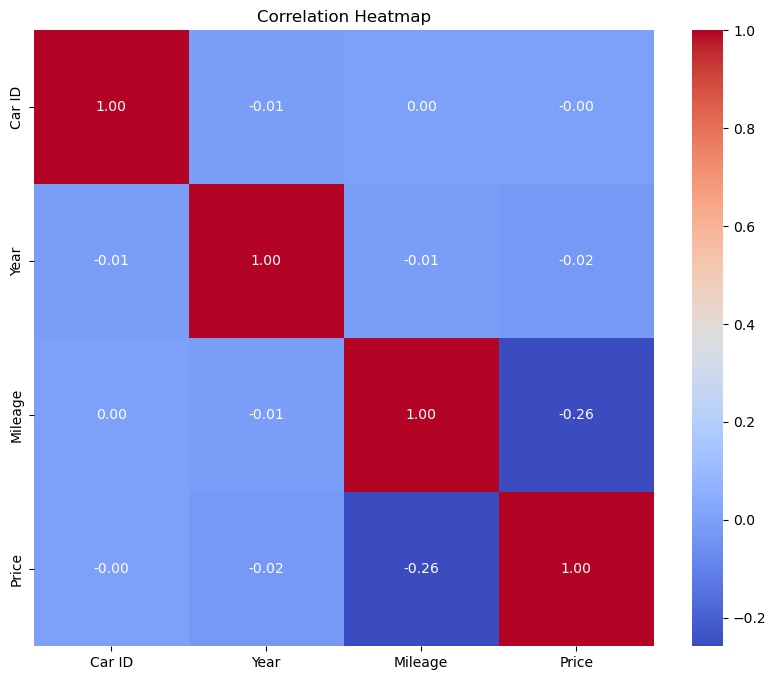

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = vma.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 6. Location Analysis:
o Explore the distribution of vehicles across different locations

In [11]:
lc=vma['Location'].value_counts()
lc

Los Angeles      246
New York         219
Chicago          192
Miami            192
San Francisco    192
Dallas           192
Atlanta          192
Phoenix          192
Houston          192
Seattle          191
Name: Location, dtype: int64

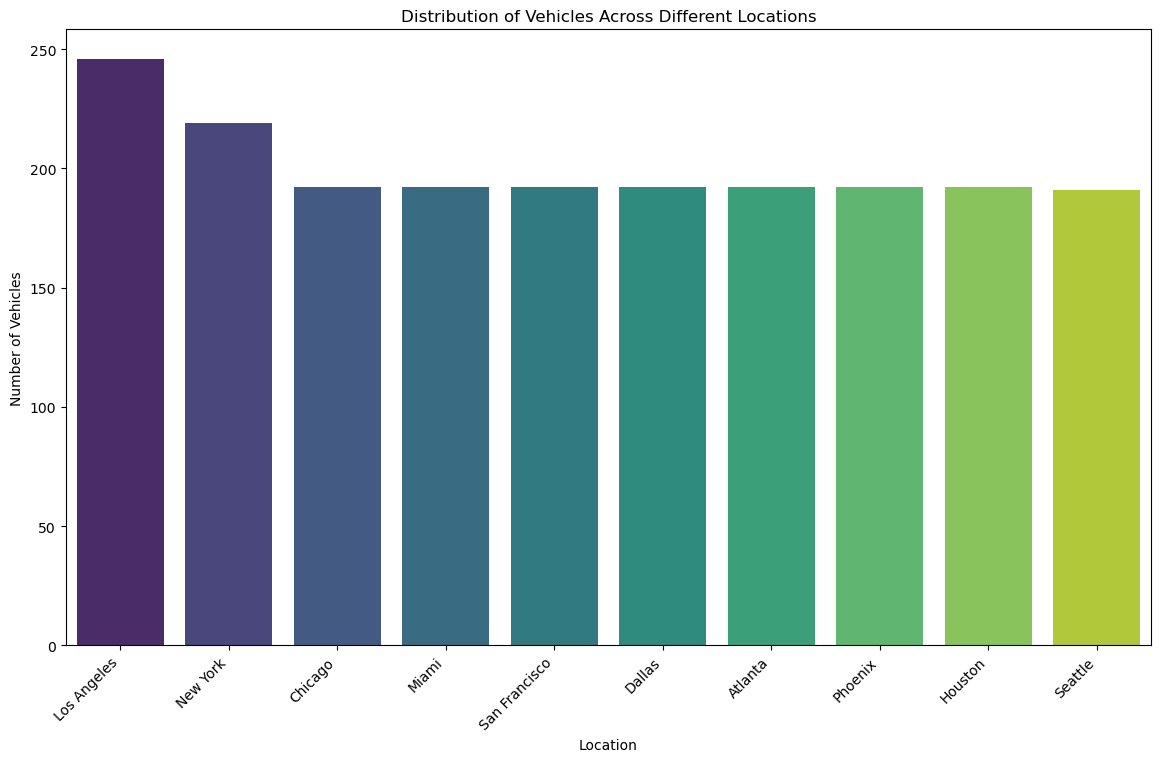

In [12]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Location', data=vma, order=lc.index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Vehicles Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Number of Vehicles')
plt.show()


o Analyze average prices in different locations.

In [15]:
pl=vma.groupby('Location')['Price'].mean().sort_values(ascending=False)
pl

Location
Miami            19859.375000
New York         19812.785388
Dallas           19755.208333
Seattle          19717.277487
Phoenix          19671.875000
San Francisco    19541.666667
Houston          19500.000000
Chicago          19463.541667
Atlanta          19432.291667
Los Angeles      19341.463415
Name: Price, dtype: float64

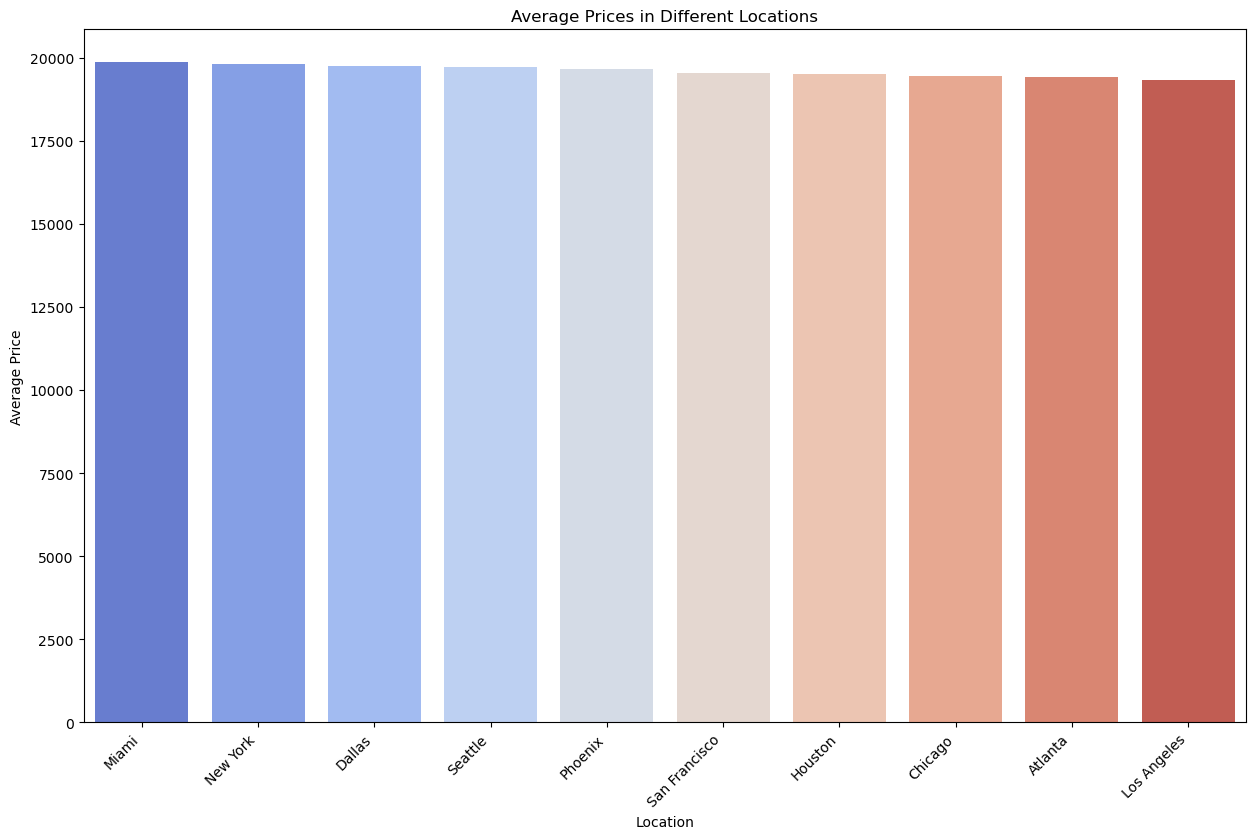

In [16]:
plt.figure(figsize=(15,9))
sns.barplot(x=pl.index,y=pl.values,palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Average Prices in Different Locations')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.show()

# 7. Time Trends:
o Explore how the average car year, mileage, and price change over time

In [21]:
vma['Year'].value_counts()

2016    347
2015    342
2017    340
2019    339
2018    317
2020    315
Name: Year, dtype: int64

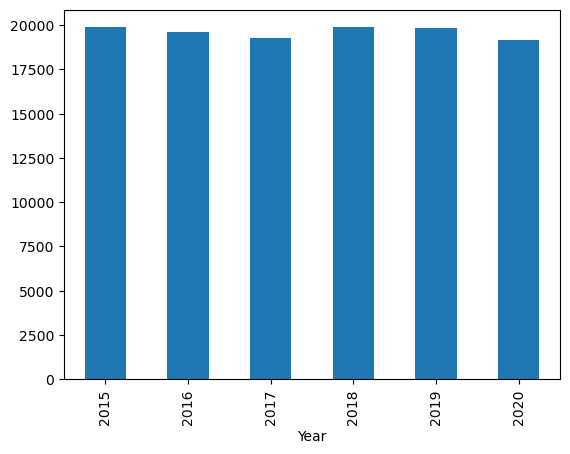

In [25]:
df1=vma.groupby('Year')['Price'].mean().plot(kind='bar')

In [24]:
df1

Year
2015    19880.116959
2016    19610.951009
2017    19252.941176
2018    19883.280757
2019    19849.557522
2020    19136.507937
Name: Price, dtype: float64

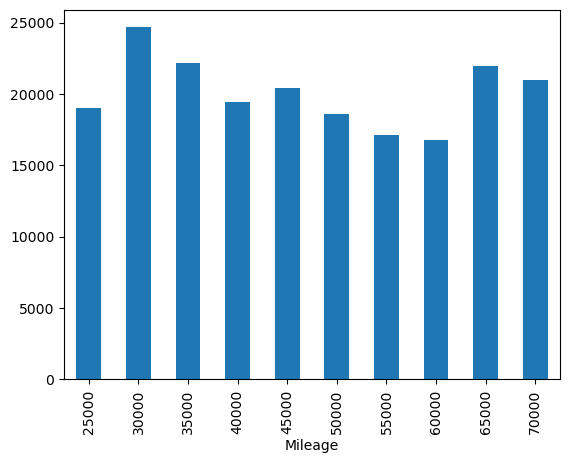

In [26]:
df2=vma.groupby('Mileage')['Price'].mean().plot(kind='bar')

# 8. Correlation Analysis:
o Check for correlations between numerical features (e.g., correlation between Year 
and Price)

In [32]:
numerical_features = ['Year', 'Mileage', 'Price']
numerical_features

['Year', 'Mileage', 'Price']

In [33]:
correlation_matrix = vma[numerical_features].corr()
correlation_matrix

,Year,Mileage,Price
Year,1.000000,-0.010104,-0.023274
Mileage,-0.010104,1.000000,-0.258460
Price,-0.023274,-0.258460,1.000000


 o Use a heatmap to visualize correlations

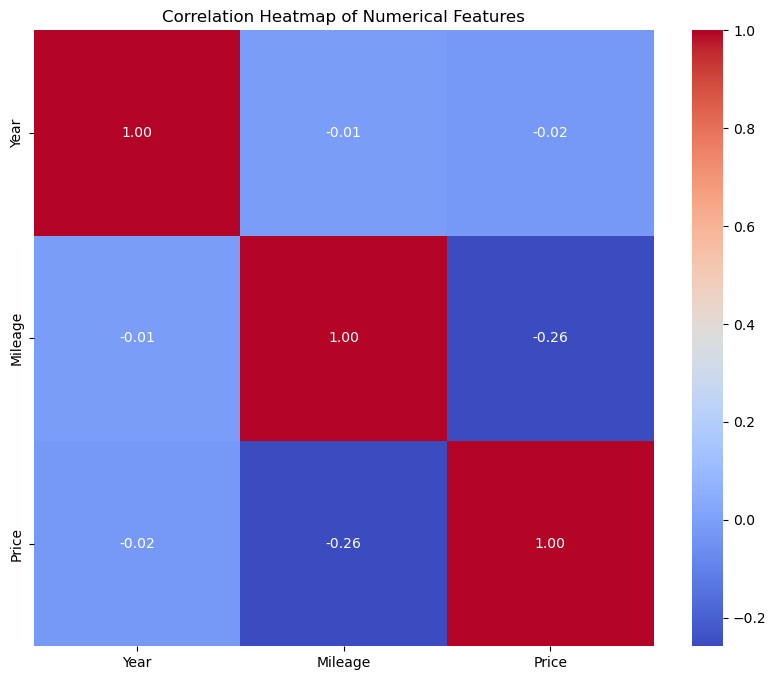

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix ,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 9. Brand and Model Comparison:
o Compare the distribution of prices, mileage, and years for different brands and 
models.

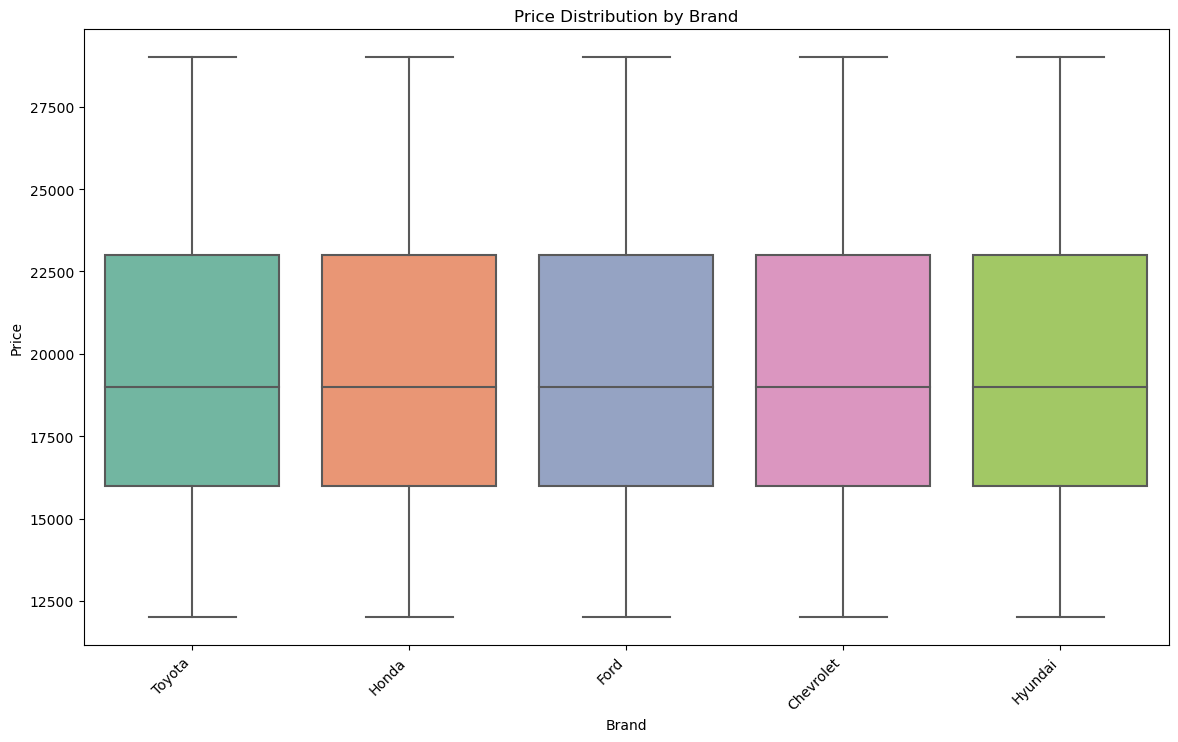

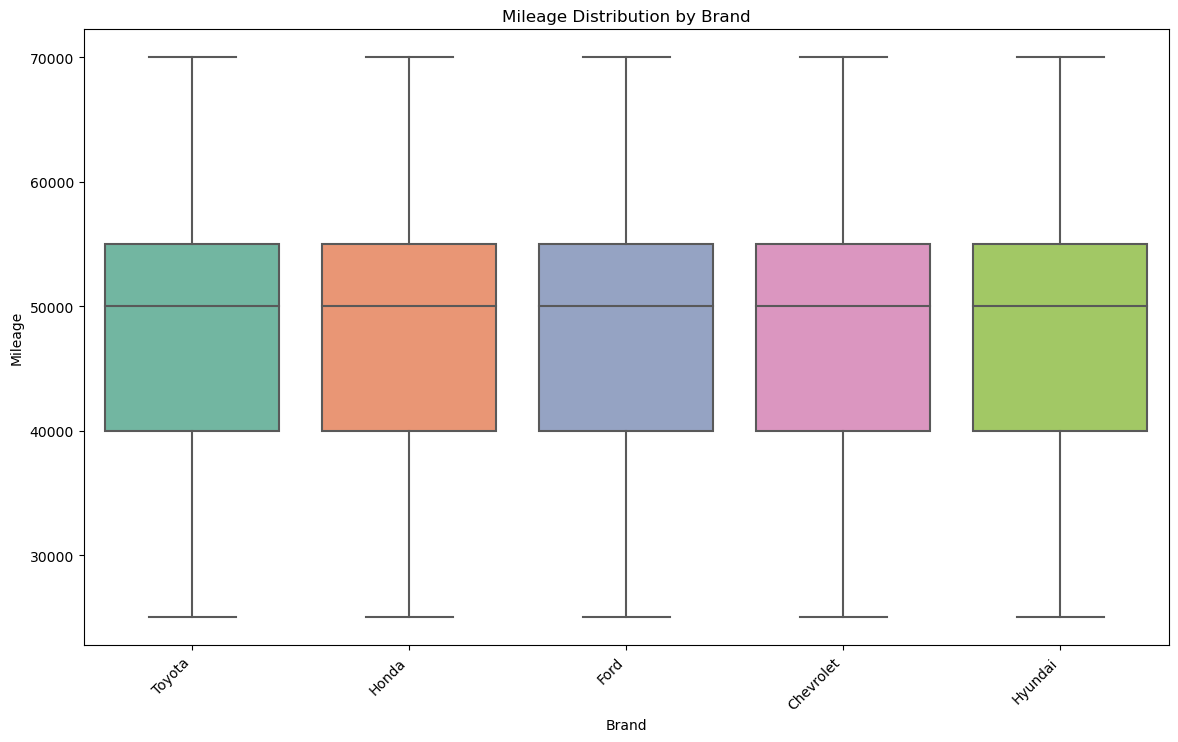

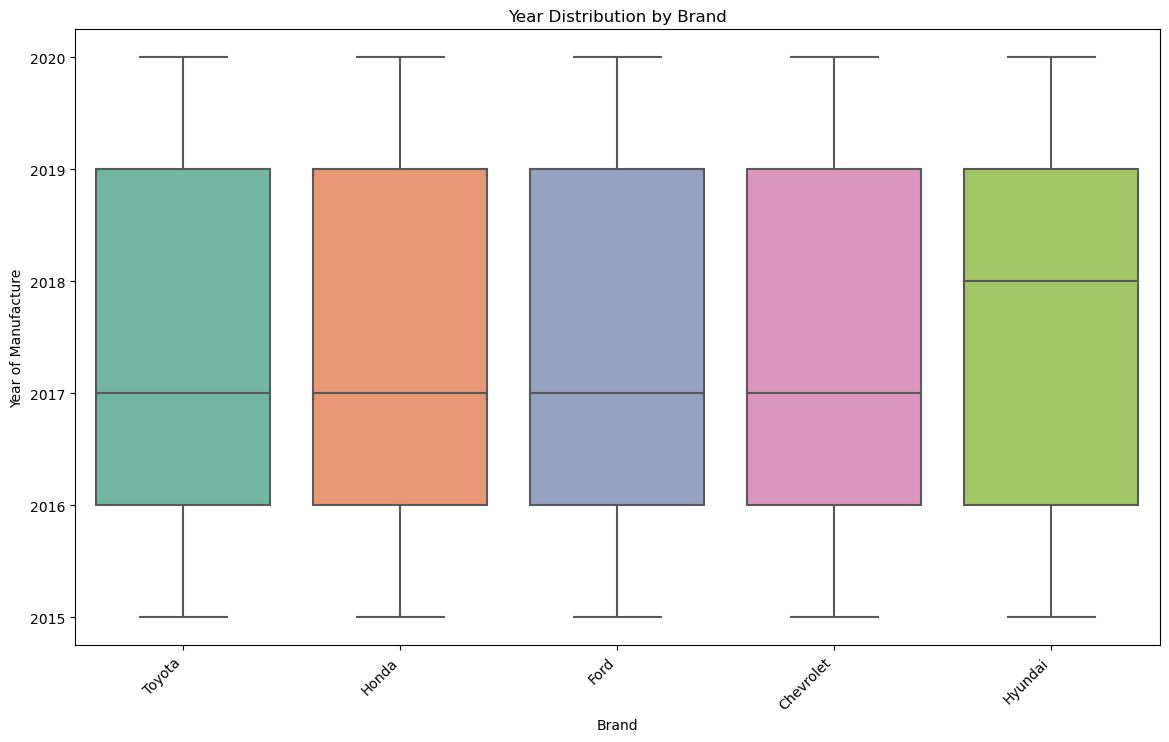

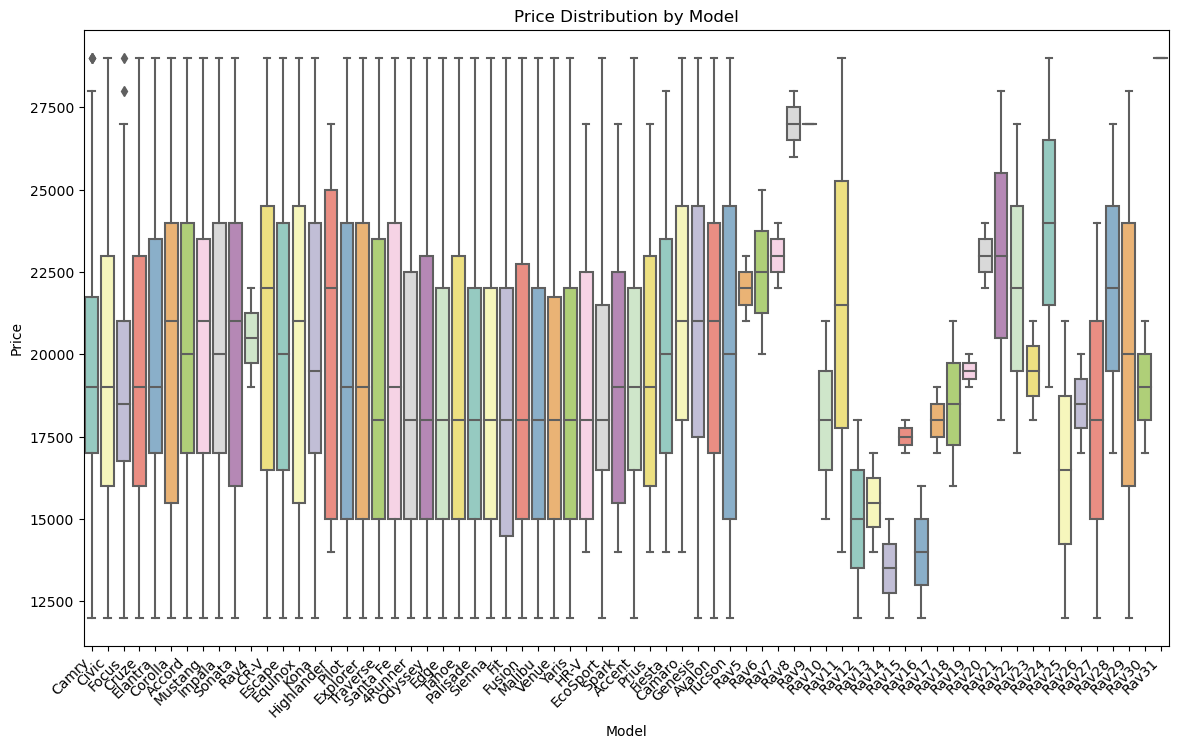

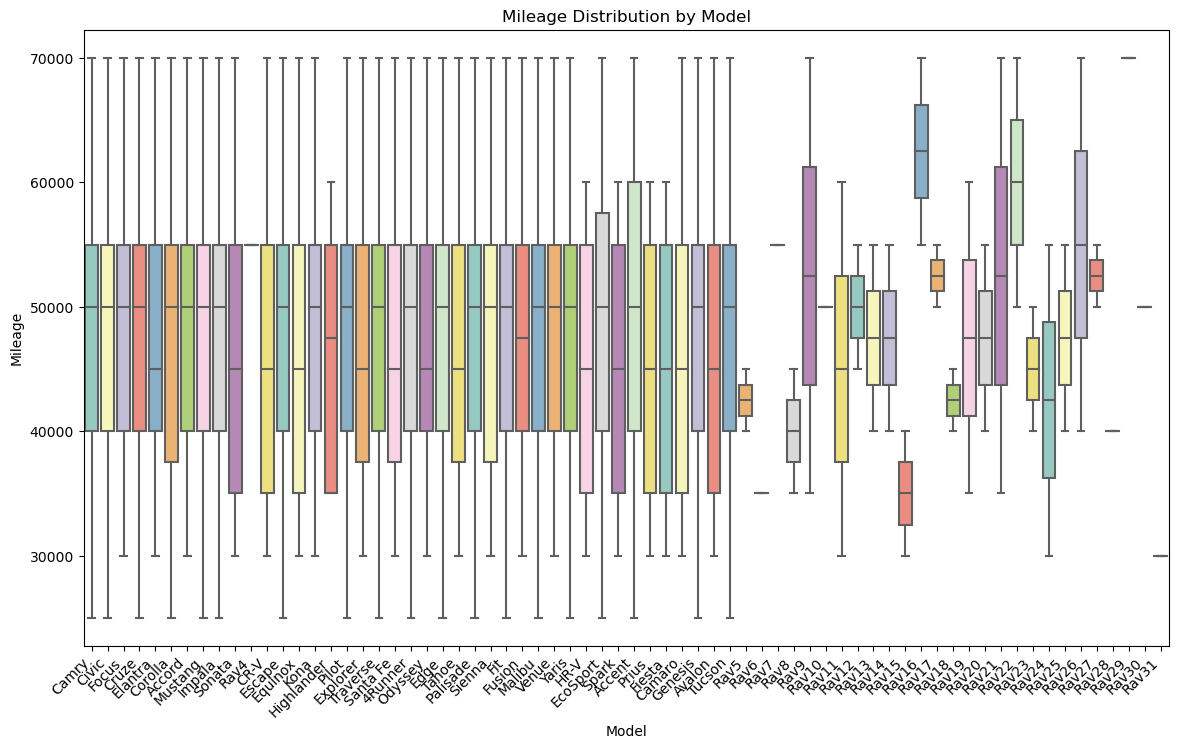

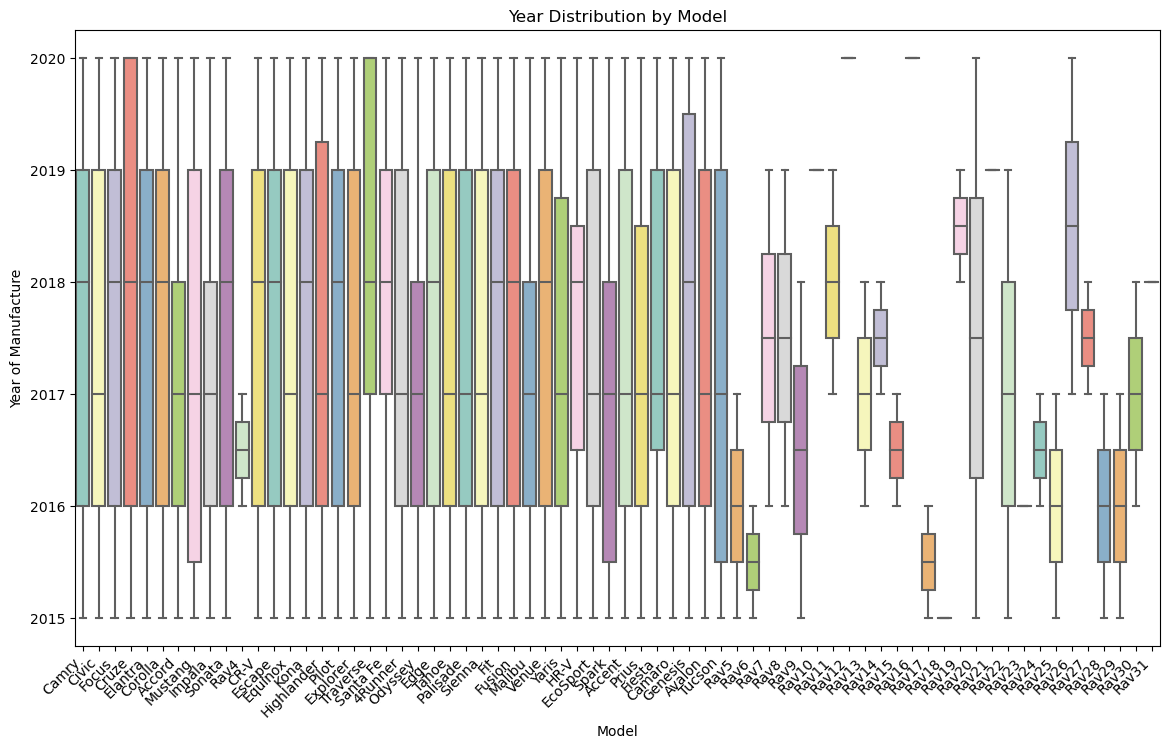

In [39]:
# Box plot: Price distribution by Brand
plt.figure(figsize=(14, 8))
sns.boxplot(x='Brand', y='Price', data=vma, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

# Box plot: Mileage distribution by Brand
plt.figure(figsize=(14, 8))
sns.boxplot(x='Brand', y='Mileage', data=vma, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Mileage Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Mileage')
plt.show()

# Box plot: Year distribution by Brand
plt.figure(figsize=(14, 8))
sns.boxplot(x='Brand', y='Year', data=vma, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Year Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Year of Manufacture')
plt.show()

# Box plot: Price distribution by Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='Price', data=vma, palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Model')
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

# Box plot: Mileage distribution by Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='Mileage', data=vma, palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Mileage Distribution by Model')
plt.xlabel('Model')
plt.ylabel('Mileage')
plt.show()

# Box plot: Year distribution by Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='Year', data=vma, palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Year Distribution by Model')
plt.xlabel('Model')
plt.ylabel('Year of Manufacture')
plt.show()

# 10. Mileage Analysis:
 Analyze the distribution of mileage and identify any outliers

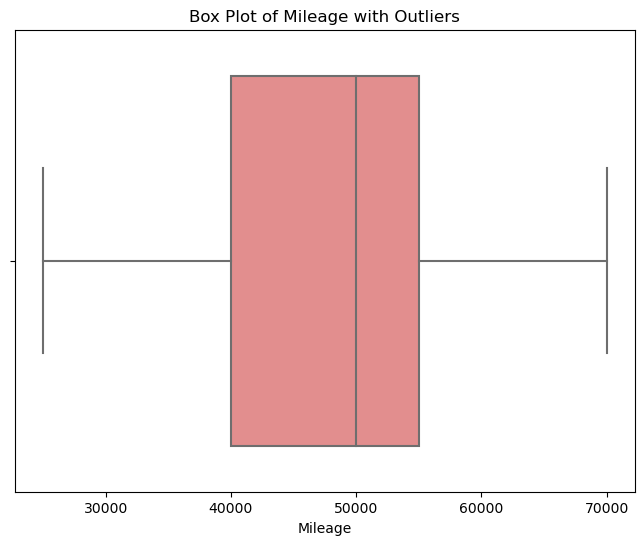

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=vma['Mileage'], color='lightcoral')
plt.title('Box Plot of Mileage with Outliers')
plt.xlabel('Mileage')
plt.show()

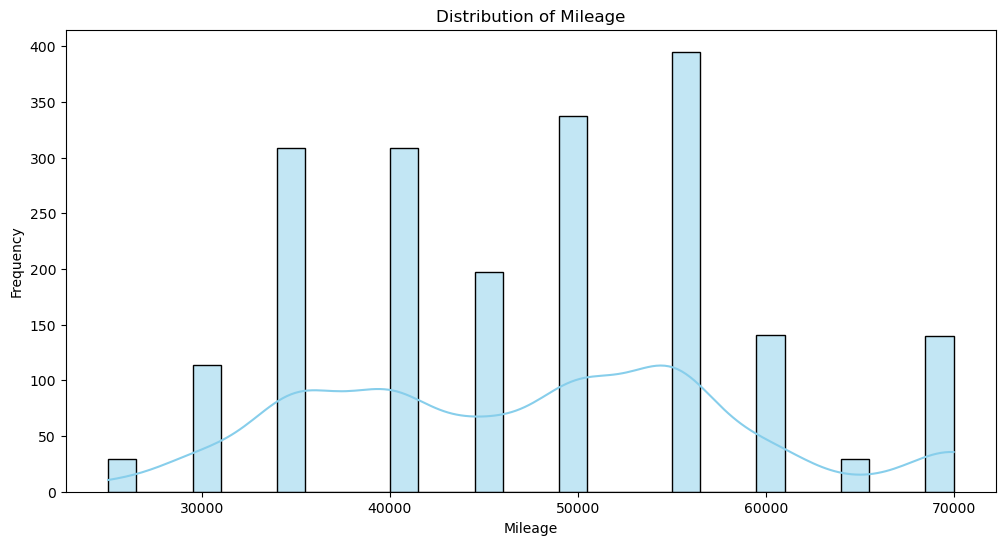

In [44]:
plt.figure(figsize=(12, 6))
sns.histplot(vma['Mileage'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()


 Explore how mileage correlates with the price.


In [45]:
correlation_coefficient = vma['Mileage'].corr(vma['Price'])
correlation_coefficient

-0.25845961843278625

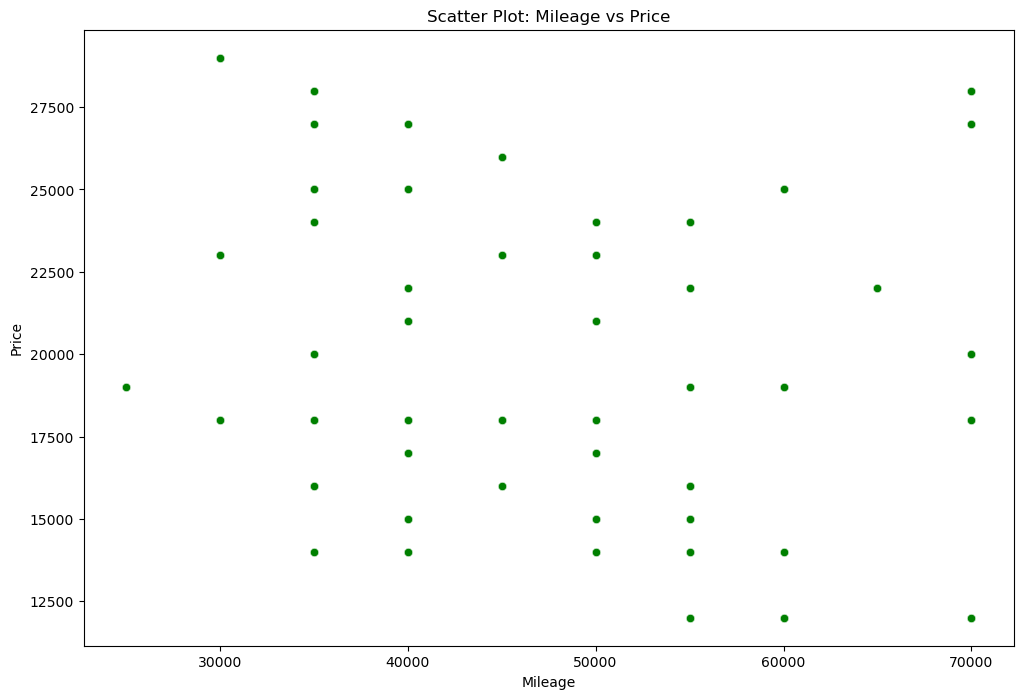

In [56]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Mileage', y='Price', data=vma, color='green', alpha=0.7)
plt.title('Scatter Plot: Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()



Conclusions
Understanding the data

.The variable 'Price' visually presents a normal distribution.

.The year of manufacture varies between 2015 and 2020

.75% of the cars were manufactured by the year 2019.

.Car prices vary between 12000.0 and 29000.0.